In [191]:
from crpapi import CRP
from ed.API_keys import get_opensecrets_key
import pandas as pd 
import numpy as np
from tqdm import tqdm
tqdm.pandas() # for progress_apply

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [133]:
# loading processed company data dataframe affected by typo (fix in cell below)
df = pd.read_pickle('assets/processed_companyData.pkl') #to load 123.pkl back to the dataframe df

idx = np.arange(137) # extra row that will be removed (ROSS - ID 59)
mask = np.ones(len(idx), dtype=bool)
mask[[48, 51, 90, 102]] = False # remove these rows (no orgid)
idx = idx[mask].copy()

df_sub = df.iloc[idx]
df_sub.reset_index(inplace=True)
names = df['title'].values

In [134]:
# updates to assets_df
## has a typo that generated MSFT data for all companies (see below)
## also, since companies don't file their 10-Qs on the same day, we just
## classify the quarter based on the month of the filing date (see below)

def month_to_quarter(month):
    # months = ['03', '06', '09', '12']
    # quarters = ['Q1', 'Q2', 'Q3', 'Q4']
    # if month in months:
    #     idx = months.index(month)
    #     return quarters[idx]
    months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
    quarters = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3', 'Q4', 'Q4', 'Q4']
    if month in months:
        idx = months.index(month)
        return quarters[idx]

def generate_assets_dataframe(assets):

    assets_list = assets['units']['USD'] # list of dicts
    assets_df = pd.DataFrame.from_dict(assets_list)
    
    # take only forms 10-Q (quarterly balance sheet data)
    is_Q = (assets_df['form'] == '10-Q')
    assets_df_Q = assets_df[is_Q]

    # take only single dates for 'end'
    assets_df.drop_duplicates('end', inplace = True, ignore_index = True)

    # obtain year and quarter
    assets_df['year'] = assets_df['end'].apply(lambda x: x.split('-')[0])
    assets_df['quarter'] = assets_df['end'].apply(lambda x: month_to_quarter(x.split('-')[1]))

    return assets_df[['end', 'val', 'quarter', 'year']]
    
df_sub['assets_summary'] = df_sub['assets'].progress_apply(generate_assets_dataframe)

100%|██████████| 133/133 [00:00<00:00, 390.53it/s]
/tmp/ipykernel_323/3428620937.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['assets_summary'] = df_sub['assets'].progress_apply(generate_assets_dataframe)


In [135]:
df_sub.loc[2].assets_summary

,end,val,quarter,year
0,2009-01-25,3350727000,Q1,2009
1,2009-07-26,3298409000,Q3,2009
2,2009-10-25,3463574000,Q4,2009
3,2010-01-31,3585918000,Q1,2010
4,2010-05-02,3803030000,Q2,2010
5,2010-08-01,3731268000,Q3,2010
6,2010-10-31,3915579000,Q4,2010
7,2011-01-30,4495246000,Q1,2011
8,2011-05-01,4736744000,Q2,2011
9,2011-07-31,4864424000,Q3,2011


In [136]:
crp=CRP(get_opensecrets_key()) #makes a CRP object

object_methods = [method_name for method_name in dir(crp) if callable(getattr(crp, method_name))]
print(dir(crp))

['BASE_URI', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'apikey', 'candidates', 'committees', 'fetch', 'http', 'indexp', 'orgs']


In [137]:
def get_os_details(name):
    def format_name(name):
        name = name.lower()
        name = name.replace(',', '')
        if ' com ' in name:
            name = name.replace(' com ', '.com ')
            name = name.replace('inc.', '')
            name = name.replace('inc', '')
        if 'inc.' in name:
            name = name.replace('inc.', 'inc')
        return name
    try:
            # name = name.lower()
            # name = name.replace(',', '')
            # if ' com ' in name:
            #     name = name.replace(' com ', '.com ')
            #     name = name.replace('inc.', '')
            #     name = name.replace('inc', '')
            # print(name)
            # if 'inc.' in name:
            #     name = name.replace('inc.', 'inc')

            # orgs = crp.orgs.get(name)
            # if type(orgs) == dict:
            #     return orgs['@attributes']
            # else:

        if name == 'Monster Beverage Corp':
            orgs = crp.orgs.get('Monster Energy')
            return orgs['@attributes']['orgid']
        if name == 'TAKE TWO INTERACTIVE SOFTWARE INC':
            orgs = crp.orgs.get('Take-Two Interactive Software')
            return orgs['@attributes']['orgid']
        if name == 'Warner Bros. Discovery, Inc.':
            orgs = crp.orgs.get('Warner Brothers Discovery')
            return orgs['@attributes']['orgid']
        if name == 'HUNT J B TRANSPORT SERVICES INC':
            orgs = crp.orgs.get('JB Hunt Transport Services')
            return orgs['@attributes']['orgid']
        if name == 'TPG Inc.':
            orgs = crp.orgs.get('TPG Capital')
            return orgs['@attributes']['orgid']
        if name == 'Warner Music Group Corp.':
            orgs = crp.orgs.get('Warner Music Group')
            return orgs['@attributes']['orgid']

        if ' ' in name:
            name_list = name.split(' ')
            for n in range(len(name_list)):
                if n == 0:
                    name = format_name(name_list[0])
                    try:
                        orgs = crp.orgs.get(name)
                    except:
                        continue
                else:
                    # print(name_list[:(n+1)])
                    # orgs = crp.orgs.get(name_list[:(n+1)].join(' '))
                    name = ' '.join(name_list[:(n+1)])
                    name = format_name(name)
                    # print(name)
                    orgs = crp.orgs.get(name)
                    
                if type(orgs) == dict:
                    return orgs['@attributes']['orgid']
                else:
                    for n in range(len(orgs)):
                        org = orgs[n]
                        if org['@attributes']['orgname'].lower() == name:
                            return org['@attributes']['orgid']

        else:
            orgs = crp.orgs.get(name)
            return orgs['@attributes']['orgid']

    except:
        return np.nan

df_sub['os_orgid'] = df_sub['title'].progress_apply(get_os_details)

100%|██████████| 133/133 [02:28<00:00,  1.12s/it]
/tmp/ipykernel_323/3833331426.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['os_orgid'] = df_sub['title'].progress_apply(get_os_details)


In [138]:
df_sub['os_orgid']

0      D000000115
1      D000021754
2      D000036303
3      D000023883
4      D000067823
          ...    
128    D000000810
129    D000091433
130    D000074301
131    D000083769
132    D000022278
Name: os_orgid, Length: 133, dtype: object

In [139]:
## Import what you'll need here
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import os
import ast
from time import sleep
import json

import matplotlib.pyplot as plt
import numpy as np

os.environ['MOZ_HEADLESS'] = '1' # prevents browser from popping up
dr = webdriver.Firefox()

In [140]:
def get_lobbying_data(orgid):
    # need to use the link below if server is failing too much
    # data = None
    # while data is None:
    #     try:
    #         dr.get("https://www.opensecrets.org/federal-lobbying/clients/summary?id=" + str(orgid))
    #         soup = BeautifulSoup(dr.page_source,
    #         'html.parser')
    #         result = soup.find_all('div')
    #         data = result[36].find_all('div', attrs = {'class' : "FusionChart"})[0]['data-source']
    #         data = ast.literal_eval(data)

    #         sleep(0.01)
    #     except:
    #         continue

    dr.get("https://www.opensecrets.org/federal-lobbying/clients/summary?id=" + str(orgid))
    soup = BeautifulSoup(dr.page_source,
    'html.parser')
    result = soup.find_all('div')
    try:
        data = result[36].find_all('div', attrs = {'class' : "FusionChart"})[0]['data-source']
    except:
        return None
    # print(data)
    # print(len(data.split('\"value\":null')))
    # data.replace("\"value\":null", "\"value\":None")
    # data = ast.literal_eval(data)
    data = json.loads(data) # behaves better than ast.literal_eval (since the file is json)

    years = data['categories'][0]['category']
    q_dict = {}
    q_dict['q1'] = data['dataset'][0]['dataset'][2]['data']
    q_dict['q2'] = data['dataset'][0]['dataset'][3]['data']
    q_dict['q3'] = data['dataset'][0]['dataset'][4]['data']
    q_dict['q4'] = data['dataset'][0]['dataset'][5]['data']
    num_lobbyists = data['lineset'][0]['data']
    
    # make an array that shows lobbying costs per quarter
    lobbying_costs = np.zeros((4, len(years)))
    for i, q in enumerate(['q1', 'q2', 'q3', 'q4']):
        for j, year in enumerate(years):
            try:
                lobbying_costs[i, j] = q_dict[q][j]['value']
            except:
                lobbying_costs[i, j] = -1

    # make a dataframe that shows lobbying costs per quarter and year
    df = pd.DataFrame()
    df['year'] = np.repeat([int(year['label']) for year in years], 4)
    df['quarter'] = ['Q1', 'Q2', 'Q3', 'Q4'] * len(years)
    df['lobbying_costs'] = lobbying_costs.flatten('F')

    # remove rows with -1 values
    df = df[df['lobbying_costs'] != -1]

    return df

In [141]:
df_sub.loc[101].os_orgid

'D000025811'

In [142]:
get_lobbying_data(df_sub.loc[102].os_orgid)

,year,quarter,lobbying_costs


In [143]:
df_sub['lobbying_summary'] = df_sub['os_orgid'].progress_apply(get_lobbying_data)

100%|██████████| 133/133 [01:33<00:00,  1.43it/s]
/tmp/ipykernel_323/3198637458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['lobbying_summary'] = df_sub['os_orgid'].progress_apply(get_lobbying_data)


In [144]:
df_sub

,index,ticker,title,assets,sector,industry,assets_summary,os_orgid,lobbying_summary
0,0,MSFT,MICROSOFT CORP,"{'label': 'Assets', 'description': 'Sum of the...",Technology,Software—Infrastructure,end val quarter year 0 ...,D000000115,year quarter lobbying_costs 40 2008 ...
1,1,AAPL,Apple Inc.,"{'label': 'Assets', 'description': 'Sum of the...",Technology,Consumer Electronics,end val quarter year 0 ...,D000021754,year quarter lobbying_costs 40 2008 ...
2,2,NVDA,NVIDIA CORP,"{'label': 'Assets', 'description': 'Sum of the...",Technology,Semiconductors,end val quarter year 0 ...,D000036303,year quarter lobbying_costs 3 2015 ...
3,3,AMZN,AMAZON COM INC,"{'label': 'Assets', 'description': 'Sum of the...",Consumer Cyclical,Internet Retail,end val quarter year 0 ...,D000023883,year quarter lobbying_costs 32 2008 ...
4,4,GOOGL,Alphabet Inc.,"{'label': 'Assets', 'description': 'Sum of the...",Communication Services,Internet Content & Information,end val quarter year 0 ...,D000067823,year quarter lobbying_costs 0 2015 ...
...,...,...,...,...,...,...,...,...,...
128,133,CG,Carlyle Group Inc.,"{'label': 'Assets', 'description': 'Sum of the...",Financial Services,Asset Management,end val quarter year 0 ...,D000000810,year quarter lobbying_costs 40 2008 ...
129,134,SWKS,"SKYWORKS SOLUTIONS, INC.","{'label': 'Assets', 'description': 'Sum of the...",Technology,Semiconductors,end val quarter year 0 2...,D000091433,year quarter lobbying_costs 2 2021 ...
130,135,TER,"TERADYNE, INC","{'label': 'Assets', 'description': 'Sum of the...",Technology,Semiconductor Equipment & Materials,end val quarter year 0 2...,D000074301,year quarter lobbying_costs 17 2018 ...
131,136,HOOD,"Robinhood Markets, Inc.","{'label': 'Assets', 'description': 'Sum of the...",Financial Services,Capital Markets,end val quarter year 0 ...,D000083769,year quarter lobbying_costs 2 2020 ...


In [145]:
# filter out data with nans for os_orgid and None for lobbying_summary and 0-length dataframe for lobbying_summary
df_sub_f = df_sub.dropna(axis=0, how='any').copy()

df_sub_f = df_sub_f[df_sub_f['lobbying_summary'].apply(lambda x: x is not None and len(x) > 0)]

In [173]:
# reset indices
df_sub_f.reset_index(inplace=True)

In [174]:
df_sub_f.to_pickle('assets/processed_companyData_sub.pkl') #to save the dataframe df to 123.pkl

In [175]:
def merge_assets_lobbying(df):
    assets = df['assets_summary']
    assets['year'] = assets_df['year'].astype(int)
    
    lobbying = df['lobbying_summary']

    # merge assets and lobbying dataframes
    merged_df = pd.merge(assets, lobbying, on = ['year', 'quarter'], how = 'inner')

    return merged_df

In [176]:
df_sub_f['merged_summary'] = df_sub_f.progress_apply(merge_assets_lobbying, axis = 1)

100%|██████████| 113/113 [00:00<00:00, 663.97it/s]


Text(0, 0.5, 'Assets')

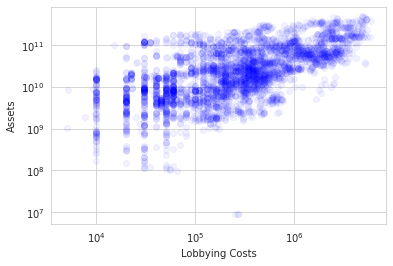

In [192]:
for i in range(len(df_sub_f)):
    combined_df = df_sub_f.loc[i].merged_summary
    plt.loglog(combined_df['lobbying_costs'], combined_df['val'], 'o', c = 'b', alpha = 0.05)
plt.xlabel('Lobbying Costs')
plt.ylabel('Assets')

In [196]:
df_sub_f.to_pickle('assets/processed_companyData_sub.pkl') #to save the dataframe df to 123.pkl

In [ ]:
# fit a straight line to the log-data


In [156]:
# how to combine two dataframes by common columns
df_msft = df_sub_f.loc[0]

In [157]:
df_msft

index                                                               0
ticker                                                           MSFT
title                                                  MICROSOFT CORP
assets              {'label': 'Assets', 'description': 'Sum of the...
sector                                                     Technology
industry                                      Software—Infrastructure
assets_summary                 end           val quarter  year
0  ...
os_orgid                                                   D000000115
lobbying_summary         year quarter  lobbying_costs
40   2008   ...
Name: 0, dtype: object

In [159]:
assets_df = df_msft['assets_summary']
lobbying_df = df_msft['lobbying_summary'] 

In [163]:
assets_df['year'] = assets_df['year'].astype(int)

In [164]:
combined_df = pd.merge(assets_df, lobbying_df, on = ['year', 'quarter'], how = 'inner')

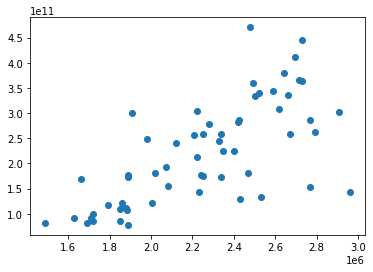

In [166]:
plt.scatter(combined_df['lobbying_costs'], combined_df['val'])

In [194]:
df_sub_f.loc[0].merged_summary

,end,val,quarter,year,lobbying_costs
0,2009-06-30,77888000000,Q2,2009,1890000.0
1,2009-09-30,81612000000,Q3,2009,1490000.0
2,2009-12-31,82096000000,Q4,2009,1690000.0
3,2010-03-31,84910000000,Q1,2010,1720000.0
4,2010-06-30,86113000000,Q2,2010,1850000.0
5,2010-09-30,91540000000,Q3,2010,1630000.0
6,2010-12-31,92306000000,Q4,2010,1710000.0
7,2011-03-31,99727000000,Q1,2011,1720000.0
8,2011-06-30,108704000000,Q2,2011,1852000.0
9,2011-09-30,107415000000,Q3,2011,1883000.0
